In [1]:
import networkx as nx
import pickle as pk
import pandas as pd
import numpy as np


In [2]:
G = pk.load(open("/home/quint/twitter_network/Pickles/follower_graph.pk", "rb"))  

In [3]:
len(G)

1051258

In [4]:
nx.density(G)

1.587767068814002e-05

In [5]:
node_attributes = {node:{} for node in G.nodes()}
for i,node in enumerate(G.nodes):
    node_attributes[node] = G.nodes[node]

In [6]:
df = pd.DataFrame.from_dict(node_attributes, orient = "index")

In [7]:
df["out_degree"] = pd.Series(dict(G.out_degree()))
df["in_degree"] = pd.Series(dict(G.in_degree()))

In [8]:
np.mean(df["out_degree"])

np.float64(16.69151245460201)

In [9]:
np.mean(df["in_degree"])

np.float64(16.69151245460201)

### Sample composition

In [20]:
for var in ["party_id", "party_reg", "gender", "binned_age", "ruca_urbanicity", "density_deciles"]:
    print(round(df[var].value_counts(normalize=True, dropna = False)*100))

party_id
Democrat       54.0
Republican     34.0
Independent    13.0
Name: proportion, dtype: float64
party_reg
<NA>           43.0
Democrat       25.0
Independent    16.0
Republican     15.0
Other           1.0
Name: proportion, dtype: float64
gender
Female     54.0
Male       43.0
Unknown     3.0
Name: proportion, dtype: float64
binned_age
30-49    46.0
18-29    25.0
50-64    21.0
65+       7.0
<NA>      1.0
Name: proportion, dtype: float64
ruca_urbanicity
metropolitan        88.0
micropolitan         7.0
small_town/rural     5.0
NaN                  0.0
not_coded            0.0
Name: proportion, dtype: float64
density_deciles
90-100    11.0
80-90     10.0
60-70     10.0
70-80     10.0
40-50     10.0
50-60     10.0
30-40     10.0
20-30     10.0
10-20     10.0
0-10       9.0
<NA>       0.0
Name: proportion, dtype: float64


In [11]:
print(round(df["race"].value_counts(normalize=True, dropna = False)*100, 1)) 

race
Caucasian           84.2
African-American     7.1
Hispanic             3.9
Unknown              2.4
Asian                1.8
Other                0.5
Name: proportion, dtype: float64


In [13]:
for var in ["party_id", "party_reg", "race", "gender", "binned_age", "ruca_urbanicity",  "density_deciles"]:
    print(round(df.groupby(var, dropna=False)["out_degree"].agg(np.mean), 1))

/tmp/ipykernel_1569991/2434534156.py:2: FutureWarning: The provided callable <function mean at 0x73647350c720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(round(df.groupby(var, dropna=False)["out_degree"].agg(np.mean), 1))
/tmp/ipykernel_1569991/2434534156.py:2: FutureWarning: The provided callable <function mean at 0x73647350c720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(round(df.groupby(var, dropna=False)["out_degree"].agg(np.mean), 1))


party_id
Democrat       19.1
Independent    12.8
Republican     14.3
Name: out_degree, dtype: float64
party_reg
Democrat       21.3
Independent    16.2
Other          16.4
Republican     14.6
NaN            14.9
Name: out_degree, dtype: float64
race
African-American    13.2
Asian               17.6
Caucasian           17.2
Hispanic            10.7
Other               12.2
Unknown             17.6
Name: out_degree, dtype: float64


/tmp/ipykernel_1569991/2434534156.py:2: FutureWarning: The provided callable <function mean at 0x73647350c720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(round(df.groupby(var, dropna=False)["out_degree"].agg(np.mean), 1))
/tmp/ipykernel_1569991/2434534156.py:2: FutureWarning: The provided callable <function mean at 0x73647350c720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(round(df.groupby(var, dropna=False)["out_degree"].agg(np.mean), 1))


gender
Female     16.5
Male       17.3
Unknown    11.6
Name: out_degree, dtype: float64
binned_age
18-29     8.7
30-49    18.4
50-64    21.2
65+      21.3
NaN      12.6
Name: out_degree, dtype: float64
ruca_urbanicity
metropolitan        17.3
micropolitan        11.5
not_coded           12.1
small_town/rural    12.5
NaN                 11.2
Name: out_degree, dtype: float64


/tmp/ipykernel_1569991/2434534156.py:2: FutureWarning: The provided callable <function mean at 0x73647350c720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(round(df.groupby(var, dropna=False)["out_degree"].agg(np.mean), 1))
/tmp/ipykernel_1569991/2434534156.py:2: FutureWarning: The provided callable <function mean at 0x73647350c720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(round(df.groupby(var, dropna=False)["out_degree"].agg(np.mean), 1))
/tmp/ipykernel_1569991/2434534156.py:2: FutureWarning: The provided callable <function mean at 0x73647350c720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

density_deciles
0-10      12.2
10-20     13.6
20-30     14.2
30-40     15.1
40-50     15.2
50-60     15.7
60-70     16.5
70-80     17.4
80-90     19.1
90-100    26.6
NaN       17.1
Name: out_degree, dtype: float64


In [14]:
for var in ["party_id", "party_reg", "race", "gender", "binned_age", "ruca_urbanicity",  "density_deciles"]:
    print(round(df.groupby(var, dropna=False)["in_degree"].agg(np.mean), 1))

party_id
Democrat       20.4
Independent    11.6
Republican     12.7
Name: in_degree, dtype: float64


/tmp/ipykernel_1569991/689099472.py:2: FutureWarning: The provided callable <function mean at 0x73647350c720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(round(df.groupby(var, dropna=False)["in_degree"].agg(np.mean), 1))
/tmp/ipykernel_1569991/689099472.py:2: FutureWarning: The provided callable <function mean at 0x73647350c720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(round(df.groupby(var, dropna=False)["in_degree"].agg(np.mean), 1))


party_reg
Democrat       24.1
Independent    18.6
Other          16.4
Republican     13.0
NaN            12.9
Name: in_degree, dtype: float64
race
African-American    13.6
Asian               18.5
Caucasian           17.3
Hispanic             8.7
Other               10.1
Unknown             19.0
Name: in_degree, dtype: float64


/tmp/ipykernel_1569991/689099472.py:2: FutureWarning: The provided callable <function mean at 0x73647350c720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(round(df.groupby(var, dropna=False)["in_degree"].agg(np.mean), 1))
/tmp/ipykernel_1569991/689099472.py:2: FutureWarning: The provided callable <function mean at 0x73647350c720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(round(df.groupby(var, dropna=False)["in_degree"].agg(np.mean), 1))


gender
Female     15.7
Male       18.2
Unknown    11.6
Name: in_degree, dtype: float64
binned_age
18-29     7.7
30-49    19.1
50-64    20.8
65+      21.5
NaN      12.5
Name: in_degree, dtype: float64
ruca_urbanicity
metropolitan        17.7
micropolitan         8.7
not_coded           33.4
small_town/rural    10.1
NaN                  6.6
Name: in_degree, dtype: float64


/tmp/ipykernel_1569991/689099472.py:2: FutureWarning: The provided callable <function mean at 0x73647350c720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(round(df.groupby(var, dropna=False)["in_degree"].agg(np.mean), 1))
/tmp/ipykernel_1569991/689099472.py:2: FutureWarning: The provided callable <function mean at 0x73647350c720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(round(df.groupby(var, dropna=False)["in_degree"].agg(np.mean), 1))
/tmp/ipykernel_1569991/689099472.py:2: FutureWarning: The provided callable <function mean at 0x73647350c720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pr

density_deciles
0-10       9.7
10-20     11.4
20-30     12.7
30-40     13.9
40-50     14.1
50-60     15.2
60-70     15.1
70-80     16.4
80-90     21.0
90-100    35.2
NaN       12.8
Name: in_degree, dtype: float64


## Sample with at least 10 followees

In [21]:
df_flt = df.loc[df.out_degree > 9,]

In [22]:
df_flt.shape

(368745, 24)

In [23]:
for var in ["party_id", "party_reg", "gender", "binned_age", "ruca_urbanicity", "density_deciles"]:
    print(round(df_flt[var].value_counts(normalize=True, dropna = False)*100))

party_id
Democrat       58.0
Republican     31.0
Independent    11.0
Name: proportion, dtype: float64
party_reg
<NA>           40.0
Democrat       30.0
Independent    15.0
Republican     13.0
Other           1.0
Name: proportion, dtype: float64
gender
Female     52.0
Male       46.0
Unknown     3.0
Name: proportion, dtype: float64
binned_age
30-49    51.0
50-64    23.0
18-29    18.0
65+       7.0
<NA>      1.0
Name: proportion, dtype: float64
ruca_urbanicity
metropolitan        90.0
micropolitan         5.0
small_town/rural     4.0
NaN                  0.0
not_coded            0.0
Name: proportion, dtype: float64
density_deciles
90-100    15.0
80-90     11.0
70-80     10.0
60-70     10.0
50-60     10.0
40-50      9.0
30-40      9.0
20-30      9.0
10-20      8.0
0-10       8.0
<NA>       0.0
Name: proportion, dtype: float64


In [18]:
round(df_flt.race.value_counts(normalize=True, dropna = False)*100, 1)

race
Caucasian           86.6
African-American     6.1
Hispanic             2.5
Unknown              2.5
Asian                1.9
Other                0.4
Name: proportion, dtype: float64

# Degree distributions

In [19]:
from collections import Counter
import bisect
import matplotlib.pyplot as plt


def dist_log_bin(x,n_bins):
    x_0 = min(x)
    x_n = max(x)
    q_0 = np.log(x_0)
    q_n = np.log(x_n)
    
    ## total range and length in log bins
    D = q_n - q_0
    L = D/n_bins
    
    ### bin limits and central points in log space
    q = [q_0 + L*i for i in range(0,n_bins)]
    q.append(q_n)
    Q = [(q[i]+q[i+1])/2 for i in range(0, n_bins)]
    
    ### bin limits and central points in linear space
    b = [round(np.exp(qi),10) for qi in q]
    b[-1] = b[-1]+0.00001
    X = [np.exp(Qi) for Qi in Q]
    
    ### I now count how many x there is in each bin, calculate the length of each bin, and use that to calculate the Ys
    S = Counter([bisect.bisect(b, xi)-1 for xi in x])
    l = [b[i+1]-b[i] for i in range(0,n_bins)]
    Y = [S.get(i,0)/(l[i]*len(x)) for i in range(0, n_bins)]
    
    return(X,Y, l)



In [20]:
df.out_degree

1000          39
1000215415     4
1000000004     2
100020673      6
100000234      3
              ..
178924975      0
2330914190     0
488108481      0
1450057333     0
174131573      0
Name: out_degree, Length: 1051258, dtype: int64

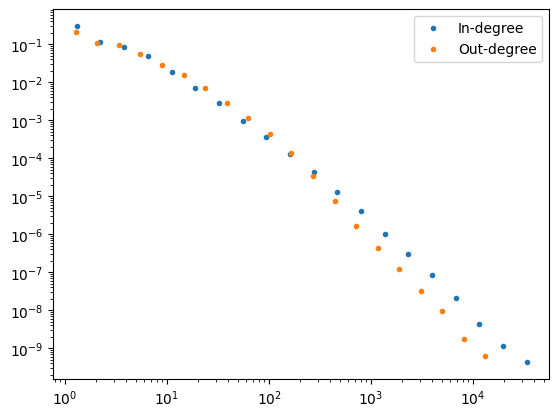

In [40]:


degrees = [k for k in df.in_degree if k > 0 ]
x,y,l = dist_log_bin(degrees, 20)
plt.loglog(x,y, '.', label = "In-degree")

degrees = [k for k in df.out_degree if k>0]
x,y,l = dist_log_bin(degrees, 20)
plt.loglog(x,y, '.', label = "Out-degree")


plt.legend()

plt.savefig("Plots/deg_dist.png", facecolor='white', bbox_inches='tight', dpi = 200)

In [30]:
df.loc[df.out_degree == 0].shape[0]/df.shape[0]

0.07200706201522367

In [31]:
df.loc[df.in_degree == 0].shape[0]/df.shape[0]

0.16000639234136624

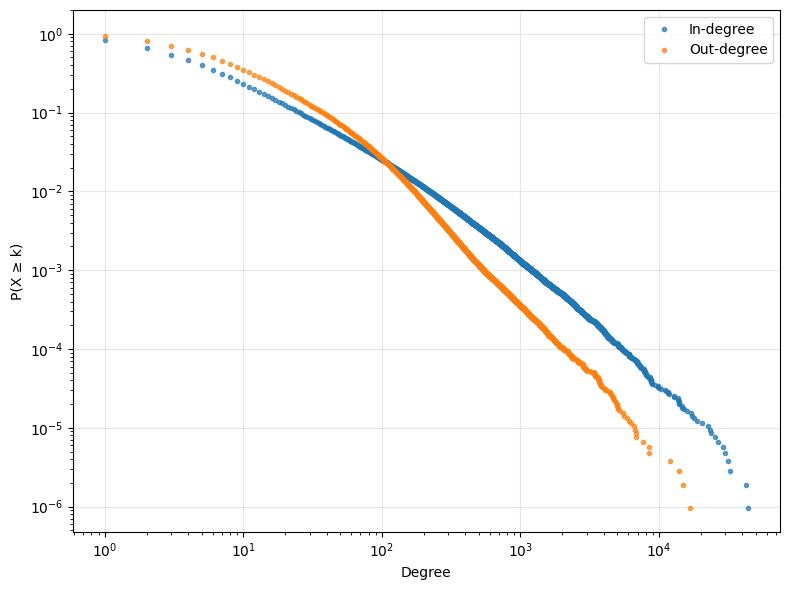

In [32]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

def ccdf(degrees):
    """
    Calculate the complementary cumulative distribution function (CCDF)
    Returns unique degree values and their CCDF values
    """
    degree_counts = Counter(degrees)
    total = len(degrees)
    
    # Sort degrees
    unique_degrees = sorted(degree_counts.keys())
    
    # Calculate CCDF: P(X >= k)
    ccdf_values = []
    for k in unique_degrees:
        # Count all nodes with degree >= k
        count = sum(degree_counts[d] for d in degree_counts if d >= k)
        ccdf_values.append(count / total)
    
    return unique_degrees, ccdf_values


# Plot cumulative distributions
plt.figure(figsize=(8, 6))

# In-degree CCDF
x, y = ccdf(df.in_degree)
plt.loglog(x, y, '.', label="In-degree", alpha=0.7)

# Out-degree CCDF
x, y = ccdf(df.out_degree)
plt.loglog(x, y, '.', label="Out-degree", alpha=0.7)

plt.xlabel('Degree')
plt.ylabel('P(X ≥ k)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [47]:
sum(df.in_degree > 1000)

1363

In [50]:
sum(df.in_degree > 1000)/df.shape[0]

0.0012965418574698124

In [51]:
sum(df.out_degree > 1000)

369

In [52]:
sum(df.out_degree > 1000)/df.shape[0]

0.00035100803037884135

Top 1% of users account for 41.8% of in-degree edges
Top 10% of users account for 76.0% of in-degree edges
Top 50% of users account for 96.8% of in-degree edges
Top 1% of users account for 21.2% of out-degree edges
Top 10% of users account for 59.4% of out-degree edges
Top 50% of users account for 93.3% of out-degree edges


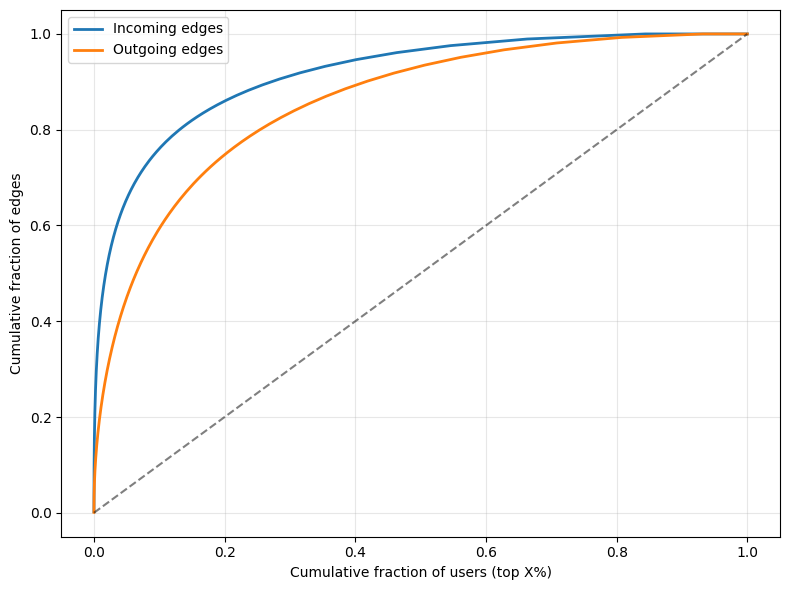

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def concentration_curve(degrees):
    """
    Calculate concentration curve showing what fraction of total edges
    the top X% of nodes account for.
    
    Returns:
        cumulative_fraction_nodes: fraction of nodes (from most to least connected)
        cumulative_fraction_edges: fraction of total edges accounted for
    """
    # Sort degrees in descending order
    sorted_degrees = sorted(degrees, reverse=True)
    total_edges = sum(sorted_degrees)
    n_nodes = len(sorted_degrees)
    
    # Calculate cumulative sums
    cumulative_edges = np.cumsum(sorted_degrees)
    
    # Convert to fractions
    cumulative_fraction_nodes = np.arange(1, n_nodes + 1) / n_nodes
    cumulative_fraction_edges = cumulative_edges / total_edges
    
    return cumulative_fraction_nodes, cumulative_fraction_edges


# Create the plot
plt.figure(figsize=(8, 6))

# In-degree concentration
x, y = concentration_curve(df.in_degree)
plt.plot(x, y, label="Incoming edges", linewidth=2)

print(f"Top 1% of users account for {y[int(0.01*len(y))]*100:.1f}% of in-degree edges")
print(f"Top 10% of users account for {y[int(0.10*len(y))]*100:.1f}% of in-degree edges")
print(f"Top 50% of users account for {y[int(0.50*len(y))]*100:.1f}% of in-degree edges")

# Out-degree concentration
x, y = concentration_curve(df.out_degree)
plt.plot(x, y, label="Outgoing edges", linewidth=2)

print(f"Top 1% of users account for {y[int(0.01*len(y))]*100:.1f}% of out-degree edges")
print(f"Top 10% of users account for {y[int(0.10*len(y))]*100:.1f}% of out-degree edges")
print(f"Top 50% of users account for {y[int(0.50*len(y))]*100:.1f}% of out-degree edges")

# Add diagonal line for perfect equality
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)

plt.xlabel('Cumulative fraction of users (top X%)')
plt.ylabel('Cumulative fraction of edges')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig("Plots/concentration_curves.png", facecolor='white',  bbox_inches='tight', dpi = 200)


In [33]:
G.size()

17547086

In [34]:
sum(df.in_degree)

17547086